In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
df_updated = df[["age", "balance", "day", "duration", #numericas
                  "job", "marital", "education", "contact", #categoricas
                  "deposit"]] # a predecir 

df_updated.head()

,age,balance,day,duration,job,marital,education,contact,deposit
0,59,2343,5,1042,admin.,married,secondary,unknown,yes
1,56,45,5,1467,admin.,married,secondary,unknown,yes
2,41,1270,5,1389,technician,married,secondary,unknown,yes
3,55,2476,5,579,services,married,secondary,unknown,yes
4,54,184,5,673,admin.,married,tertiary,unknown,yes


transformacion de atributos categoricos a numericos

In [4]:
# Ahora, queremos transformar los 
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown = 'ignore', sparse_output = False).set_output(transform = 'pandas') # Instanciamos el ohe

ohe_job = ohe.fit_transform(df_updated[['job']])
ohe_marital = ohe.fit_transform(df_updated[['marital']])
ohe_education = ohe.fit_transform(df_updated[['education']])
ohe_contact = ohe.fit_transform(df_updated[['contact']])

Mostramos las columnas afectadas por el OneHotEncoder

In [5]:
ohe_job.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
ohe_marital.head()

,marital_divorced,marital_married,marital_single
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0


In [7]:
ohe_education.head()

,education_primary,education_secondary,education_tertiary,education_unknown
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0


In [8]:
ohe_contact.head()

,contact_cellular,contact_telephone,contact_unknown
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


Reemplazamos en el df_updated las variables encodeadas 

In [9]:
df_updated = pd.concat([df_updated, ohe_job], axis = 1).drop(columns = ['job'])
df_updated = pd.concat([df_updated, ohe_marital], axis = 1).drop(columns = ['marital'])
df_updated = pd.concat([df_updated, ohe_education], axis = 1).drop(columns = ['education'])
df_updated = pd.concat([df_updated, ohe_contact], axis = 1).drop(columns = ['contact'])

In [10]:
# Ahora nos fijamos como quedó finalmente el df con los atributos cat. encodeados
df_updated.head()

,age,balance,day,duration,deposit,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown
0,59,2343,5,1042,yes,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,56,45,5,1467,yes,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,41,1270,5,1389,yes,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,55,2476,5,579,yes,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,54,184,5,673,yes,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


Train val y test

In [11]:
from sklearn.model_selection import train_test_split

# Nos hacemos un df con todos los datos a entrenar
df_features = df_updated.drop(columns = ["deposit"]) 

# Separamos los datos en X e Y, y en train y test 
X = df_features
y = df_updated[["deposit"]]

print(X.shape)

#separar en train val y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42) 



# Mostramos su shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(11162, 26)


((6696, 26), (2233, 26), (6696, 1), (2233, 1))

Modelo de Regresión Logística

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Analizamos los resultados del modelo

0.7595163457232422


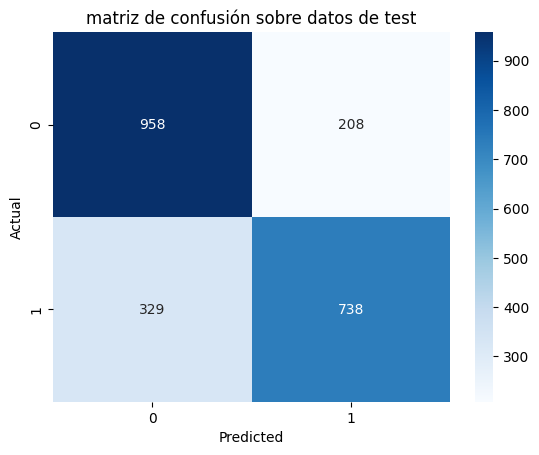

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#acuracy en test
accuracy_score(y_test, y_pred)
print (accuracy_score(y_test, y_pred))

#  Matriz de Confusión sobre los datos de Test
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('matriz de confusión sobre datos de test')
plt.show()

mas metricas

In [15]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.74      0.82      0.78      1166
         yes       0.78      0.69      0.73      1067

    accuracy                           0.76      2233
   macro avg       0.76      0.76      0.76      2233
weighted avg       0.76      0.76      0.76      2233



ROC AUC Score Curve 

In [27]:
# Convertir y_test a valores binarios
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_test_bin = label_encoder.fit_transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7566356032607735


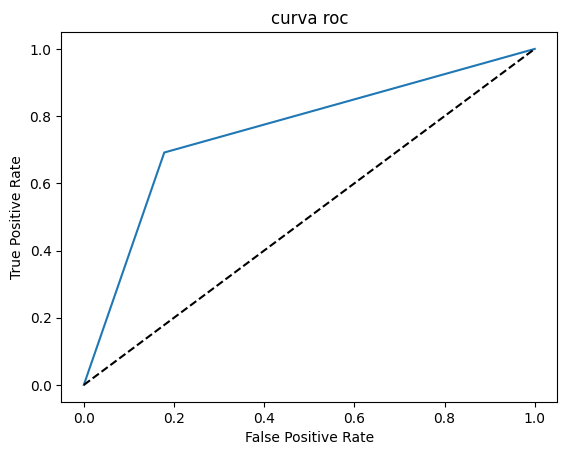

In [31]:
#roc auc score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test_bin, y_pred_encoded)

print (roc_auc_score(y_test_bin, y_pred_encoded))

from sklearn.metrics import roc_curve
#roc curve
fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_encoded)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('curva roc')
plt.show()


Comparación de coeficientes / betas (sin escalado)

In [16]:
# Valores de los betas de la función
print("Coeficientes: ", log_model.coef_)
print("")
print("Intercepciones: ", log_model.intercept_)

Coeficientes:  [[-4.24227157e-03  3.56500228e-05 -2.00130152e-02  4.84782246e-03
   4.37538534e-02 -6.60664162e-01 -1.19256872e-01 -2.00224049e-02
  -2.73048420e-01  5.99942139e-01 -9.45479103e-02 -2.69295414e-01
   2.17459870e-01 -1.26523353e-01 -3.61507606e-03 -5.39290854e-03
  -6.02121563e-02 -4.28826512e-01 -2.22171991e-01 -3.24725171e-01
  -3.83135985e-01 -6.65662919e-02  6.32167889e-02  5.02671698e-01
   2.45816848e-01 -1.45969920e+00]]

Intercepciones:  [-0.71218471]


<BarContainer object of 26 artists>

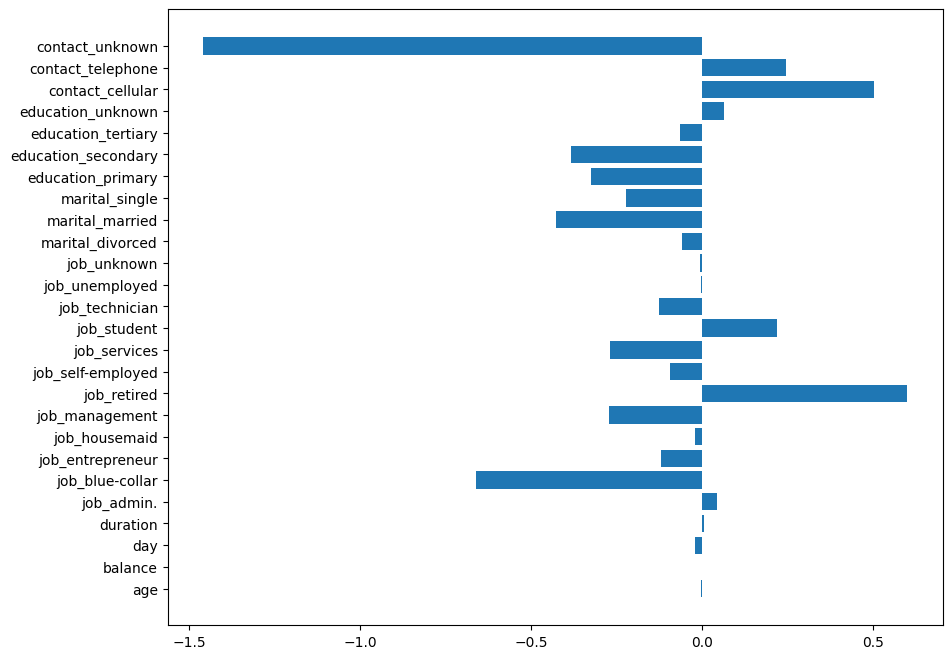

In [17]:
# Ploteamos 
fig, ax = plt.subplots(figsize=(10, 8))

ax.barh(df_features.columns, log_model.coef_[0])

Feature importance

Index(['columm', 'coef'], dtype='object')


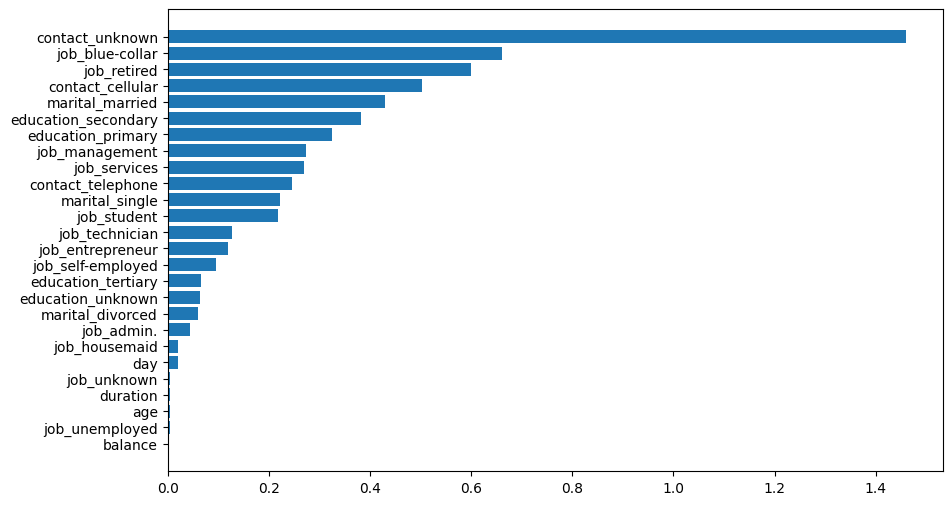

In [18]:
import numpy as np 

fig, ax = plt.subplots(figsize = (10, 6))

feature_importances = pd.DataFrame(
    {"columm": df_features.columns, "coef": np.abs(log_model.coef_[0])} 
).sort_values(by = "coef", ascending = True)

ax.barh(feature_importances["columm"], feature_importances["coef"])
print(feature_importances.columns)